<a href="https://colab.research.google.com/github/nightingale41/practice-data-analysis-and-visualization/blob/main/data_analysis_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/gdrive/My Drive/bisa_ai/train_and_test2.csv')

In [ ]:
print('Ukuran data : ', data.shape)

Ukuran data :  (1309, 28)


In [ ]:
import seaborn as sns

In [ ]:
!apt-get -qq install -y libfluidsynth1

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
sh: 0: getcwd() failed: No such file or directory
Selecting previously unselected package libfluidsynth1:amd64.
(Reading database ... 160988 files and directories currently installed.)
Preparing to unpack .../libfluidsynth1_1.1.9-1_amd64.deb ...
Unpacking libfluidsynth1:amd64 (1.1.9-1) ...
Setting up libfluidsynth1:amd64 (1.1.9-1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.2) ...
/sbin/ldconfig.real: /usr/local/lib/python3.7/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link



In [ ]:
import matplotlib.pyplot as plt

Analisis Data

In [ ]:
data.isnull().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       2
zero.17        0
zero.18        0
2urvived       0
dtype: int64

Jumlah penumpang berdasarkan usia

In [ ]:
print(pd.value_counts(data.Age))

28.00    295
24.00     47
22.00     43
21.00     41
30.00     40
        ... 
76.00      1
22.50      1
74.00      1
80.00      1
0.67       1
Name: Age, Length: 98, dtype: int64


Jumlah penumpang berdasarkan usia dengan level of measurement berupa interval

In [ ]:
print(pd.value_counts(data.Age, bins=8))

(20.128, 30.106]    624
(30.106, 40.085]    210
(10.149, 20.128]    162
(40.085, 50.064]    132
(0.0892, 10.149]     86
(50.064, 60.043]     62
(60.043, 70.021]     27
(70.021, 80.0]        6
Name: Age, dtype: int64


Dari analisis di atas kita tau bahwa sebagian besar penumpang berusia antara 20-30 tahun

Data di bawah menunjukan jumlah penumpang berdasarkan tempat mereka berangkat. Nama lokasi yang categorical nominal diubah menjadi bentuk angka sebagai representasi.

In [ ]:
print(pd.value_counts(data.Embarked, dropna=False))

2.0    914
0.0    270
1.0    123
NaN      2
Name: Embarked, dtype: int64


Dari data di bawah ini kita tau hampir seluruh penumpang membayar kurang dari 64 untuk tiket mereka

In [ ]:
print(pd.value_counts(data.Fare, bins=8))

(-0.513, 64.041]      1133
(64.041, 128.082]      109
(128.082, 192.123]      29
(192.123, 256.165]      21
(256.165, 320.206]      13
(448.288, 512.329]       4
(384.247, 448.288]       0
(320.206, 384.247]       0
Name: Fare, dtype: int64


Plot di bawah ini menunjukan distrubusi dari sebuah variable dan relasi antara 2 variable dengan pembeda warna penumpang yang selamat dan tidak selamat. Biru merupakan penumpang tidak selamat, dan orange penumpang selamat

Dapat dilihat bahwa penumpang dengan usia 20 - 30 tahun memiliki jumlah kematian terbanyak, namun memiliki survival rate tertinggi (dapat disebabkan dari penyebaran umur penumpang didominasi usia 20-30an) dan laki laki memiliki nilai survival rate yang lebih kecil dibanding perempuan (dapat diasumsikan karena pertolongan diprioritaskan untuk perempuan, anak anak, dan orang tua).

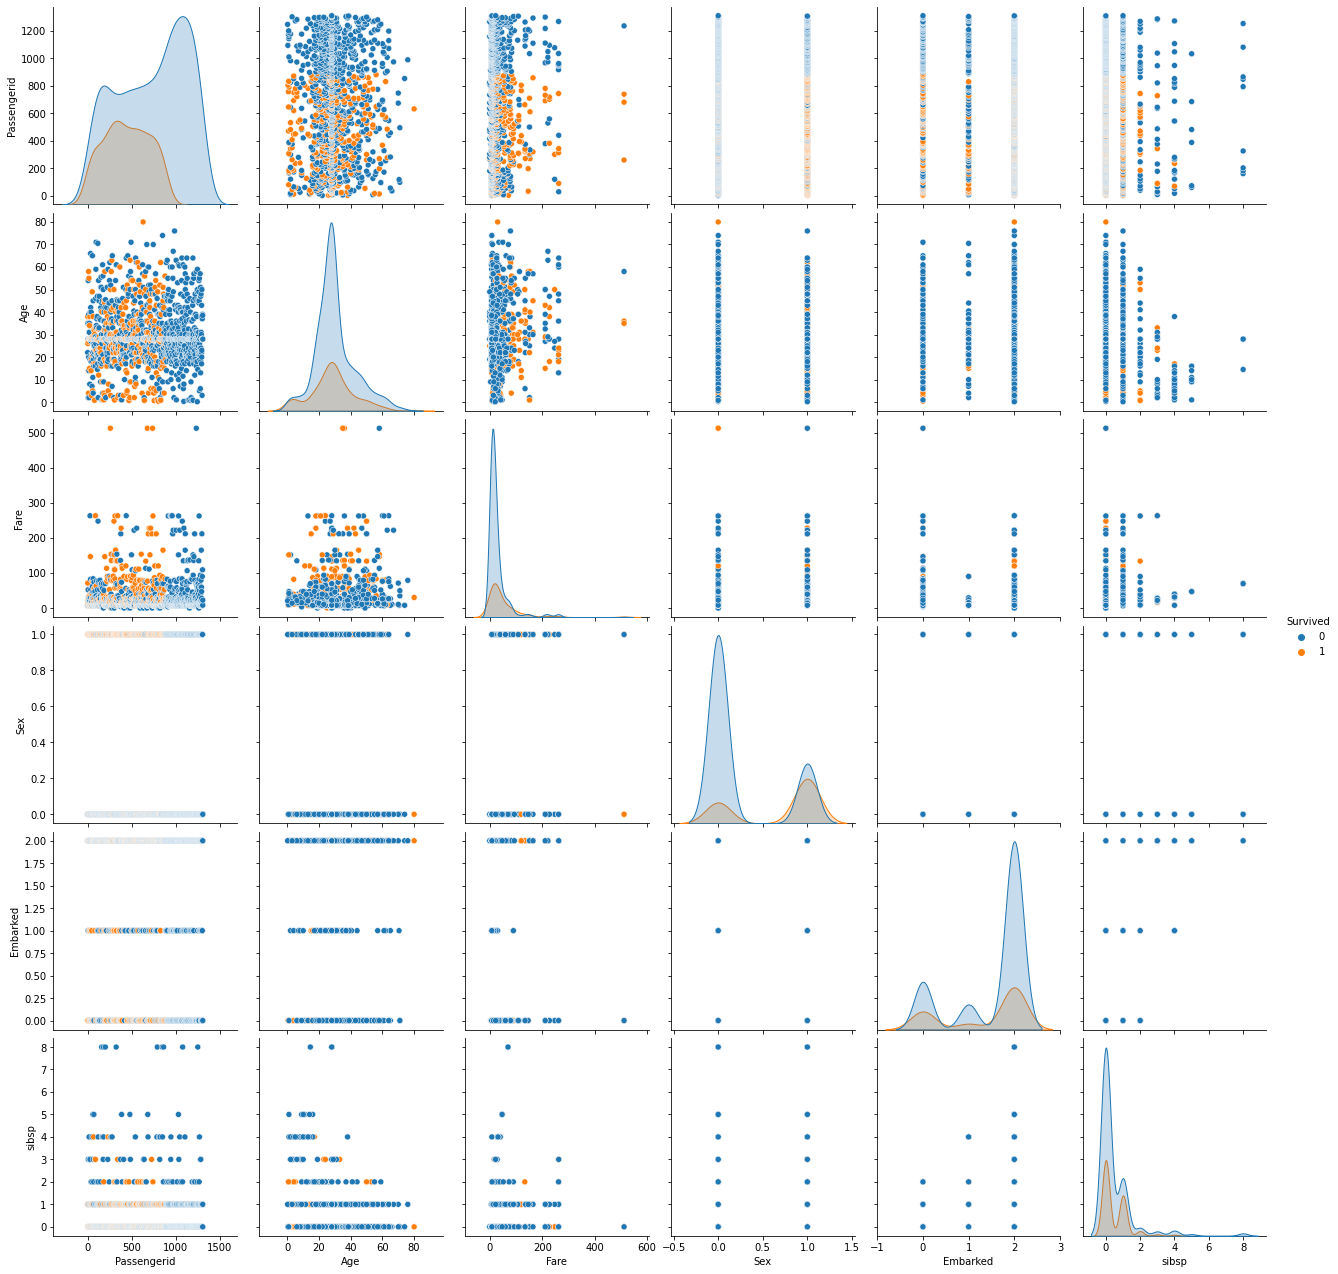

In [ ]:
sns.pairplot(data, hue="Survived", height=3, vars=['Passengerid', 'Age', 'Fare', 'Sex', 'Embarked', 'sibsp'])
plt.show()

In [ ]:
data.describe()

,Passengerid,Age,Fare,Sex,sibsp,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,Parch,zero.7,zero.8,zero.9,zero.10,zero.11,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.0,1309.0,1309.0,1309.0,1309.0,1309.0,1309.000000,1309.0,1309.0,1309.0,1309.0,1309.0,1309.0,1309.0,1309.0,1309.000000,1309.0,1309.0,1307.000000,1309.0,1309.0,1309.000000
mean,655.000000,29.503186,33.281086,0.355997,0.498854,0.0,0.0,0.0,0.0,0.0,0.0,0.385027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.294882,0.0,0.0,1.492731,0.0,0.0,0.261268
std,378.020061,12.905241,51.741500,0.478997,1.041658,0.0,0.0,0.0,0.0,0.0,0.0,0.865560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.837836,0.0,0.0,0.814626,0.0,0.0,0.439494
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
25%,328.000000,22.000000,7.895800,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000,0.0,0.0,1.000000,0.0,0.0,0.000000
50%,655.000000,28.000000,14.454200,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,0.000000
75%,982.000000,35.000000,31.275000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000
max,1309.000000,80.000000,512.329200,1.000000,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000


dari data di atas, dapat dibuktikan bahwa rata rata usia penumpang adalah 29 tahun dengan SD sebesar 12 tahun. 

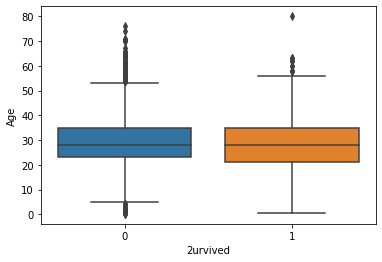

In [ ]:
sns.boxplot(x="2urvived", y="Age", data=data)
plt.show()

Data Visualization

In [ ]:
number_all = data.groupby('Sex').count().Passengerid

In [ ]:
print(number_all)

Sex
0    843
1    466
Name: Passengerid, dtype: int64


In [ ]:
number_male_all = number_all[0]
number_female_all = number_all[1]


In [ ]:
import numpy as np

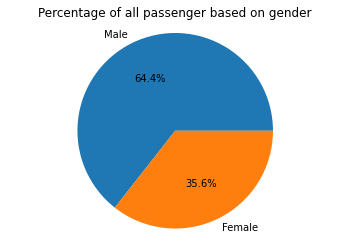

In [ ]:
pie_chart = [number_male_all, number_female_all]
fig, ax = plt.subplots()
ax.pie(pie_chart, labels=['Male', 'Female'], autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Percentage of all passenger based on gender')


plt.show()

In [ ]:
data.rename(columns = {'2urvived' : 'Survived'}, inplace = True)

In [ ]:
data.groupby('Survived').count().Passengerid

Survived
0    967
1    342
Name: Passengerid, dtype: int64

In [ ]:
number_survived = data[data.Survived == 1].groupby('Sex').count().Passengerid

In [ ]:
print(number_survived)

Sex
0    109
1    233
Name: Passengerid, dtype: int64


In [ ]:
number_male_survived = number_survived[0]
number_female_survived = number_survived[1]

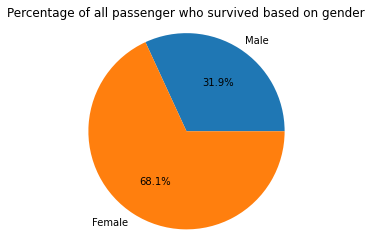

In [ ]:
pie_chart2 = [number_male_survived, number_female_survived]
fig, ax = plt.subplots()
ax.pie(pie_chart2, labels=['Male', 'Female'], autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Percentage of all passenger who survived based on gender')


plt.show()

Gambar pie chart di atas menunjukan persentase penumpang selamat berdasarkan jenis kelamin mereka

In [ ]:
age_survived = data.query('Survived==1')['Age']

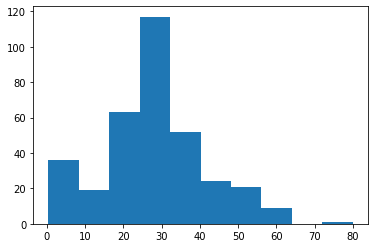

In [ ]:
plt.hist(age_survived, bins=10)
plt.show()

Histogram di atas menunjukan jumlah dari penumpang selamat berdasarkan usia.

Insight yang dapat diambil dari data titanic tersebut terkait dengan survival rate para penumpang adalah, usia dan gender menjadi faktor utama yang mempengaruhi. Penumpang dengan usia antara 20-30an menjadi mayoritas populasi dan secara logika, sedang dalam kondisi prime. Sehingga, korban terbanyak yang tidak selamat ada dalam populasi tersebut. Sedangkan, gender berpengaruh karena dalam proses evakuasi, laki-laki dan yang berusia prima akan mendahulukan korban lain yang masih kecil, sudah tua, ataupun wanita.